In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alinaderi1/wind-turbine-gearbox-cm-vibration")

print("Path to dataset files:", path)

/home/amanda/Desktop/XP Educacao/ProjetoFinal/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/amanda/.cache/kagglehub/datasets/alinaderi1/wind-turbine-gearbox-cm-vibration/versions/1


In [3]:
import os

for root, dirs, files in os.walk(path):
    for name in files:
        print("File:", os.path.join(root, name))

File: /home/amanda/.cache/kagglehub/datasets/alinaderi1/wind-turbine-gearbox-cm-vibration/versions/1/Healthy_data.csv
File: /home/amanda/.cache/kagglehub/datasets/alinaderi1/wind-turbine-gearbox-cm-vibration/versions/1/Vibration Condition Monitoring Benchmarking Datasets.pdf
File: /home/amanda/.cache/kagglehub/datasets/alinaderi1/wind-turbine-gearbox-cm-vibration/versions/1/Damaged_data.csv


### Pré-Processamento - Limpeza, Filtragem e Extração de Características (RMS, PEAK, Standard Deviation e PSD)

In [4]:
import pandas as pd

df_healthy_data = pd.read_csv(os.path.join(path, "Healthy_data.csv"))
df_damaged_data = pd.read_csv(os.path.join(path, "Damaged_data.csv"))

In [5]:
df_damaged_data

,D1_AN3,D1_AN4,D1_AN5,D1_AN6,D1_AN7,D1_AN8,D1_AN9,D1_AN10,D1_Speed,D1_Torque,...,D9_AN3,D9_AN4,D9_AN5,D9_AN6,D9_AN7,D9_AN8,D9_AN9,D9_AN10,D9_Speed,D9_Torque
0,2.545462,-2.361234,-2.409477,2.432188,2.626045,-5.357677,20.829383,-2.788547,1800.972842,141.033745,...,-2.939878,-1.095603,-2.631198,1.090969,0.588510,-3.835698,-0.308929,1.800082,1803.013257,145.367911
1,1.563059,-2.624202,-2.447165,-0.847906,-0.556265,-5.642339,13.645422,-7.001352,1800.974039,141.043524,...,-4.300604,-1.683561,-0.910289,-0.888397,-3.586867,-4.703077,-7.007682,1.818578,1803.032411,145.331381
2,0.778694,-2.867568,-1.410018,-4.091225,-0.264509,-4.581916,4.803605,-9.201859,1800.823806,141.036893,...,-4.610935,-0.562164,0.361671,-2.592594,-6.206488,-5.179107,-15.680748,0.872355,1803.079697,145.363527
3,0.723852,-3.471605,0.430807,-1.961157,0.794714,-5.244651,-3.429302,-7.974679,1800.992594,141.045884,...,-4.259510,0.122553,0.667456,0.926131,-5.208304,-6.374085,-14.415046,-0.015354,1802.724762,145.347791
4,1.684005,-3.648304,0.979481,0.813405,0.241067,-9.047267,-9.229768,-5.387307,1800.841763,141.040264,...,-3.913132,0.629143,0.564793,2.088019,-3.124721,-6.550861,-6.160722,-1.381204,1801.959830,145.356446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,-5.110501,1.847044,1.226041,0.213713,-2.404016,9.389438,-3.040840,4.030373,1796.748361,146.611848,...,-1.079163,0.419136,1.628493,2.362108,1.071479,5.818377,0.865811,0.479906,1801.001573,150.451338
2399996,-5.603580,2.402435,1.399429,-5.911024,-4.066266,2.045661,-2.116951,1.751308,1796.747160,146.563852,...,-0.380888,0.537080,1.886922,2.153666,1.702943,7.210465,7.885083,-1.720625,1800.902215,150.453474
2399997,-7.102355,2.189799,2.989288,1.308875,-4.923211,-2.225450,-0.887806,-1.598704,1796.739981,146.619940,...,-0.862779,0.390575,2.672124,-0.291102,-1.670817,5.056849,2.539423,-2.764369,1800.757966,150.454935
2399998,-7.564308,2.180457,4.849446,2.338509,-4.773525,-2.835677,-2.654471,-3.491960,1796.793249,146.543845,...,-2.183207,-0.561959,2.796078,4.790345,-8.474858,-0.141922,-4.016550,-3.410917,1800.946505,150.449764


In [6]:
df_healthy_data = df_healthy_data.dropna()
df_damaged_data = df_damaged_data.dropna()

In [7]:
vector_1_AN3_aq1 = df_healthy_data['H1_AN3']
vector_2_AN3_aq1 = df_damaged_data['D1_AN3']
vector_3_AN3_aq1 = df_damaged_data['D2_AN3']
vector_4_AN3_aq1 = df_damaged_data['D3_AN3']
vector_5_AN3_aq2 = df_damaged_data['D4_AN3']
vector_6_AN3_aq3 = df_damaged_data['D5_AN3']
vector_7_AN3_aq4 = df_damaged_data['D6_AN3']
vector_8_AN3_aq5 = df_damaged_data['D7_AN3']

In [ ]:
vectors_sensors = dict()

sensors = ['AN3', 'AN4', 'AN5', 'AN6', 'AN7', 'AN8', 'AN9', 'AN10']

for i, sensor in enumerate(sensors):
    vector = []
    if i==0:
        vector = df_healthy_data['H1_AN3']

In [8]:
from scipy.signal import butter, filtfilt
import numpy as np

def lowpass_filter(signal, fs, cutoff=2000, order=4):
    """
    Aplica um filtro passa-baixa Butterworth de 4ª ordem.

    Parâmetros:
        signal (array-like): Sinal de entrada (1D)
        fs (float): Frequência de amostragem (Hz)
        cutoff (float): Frequência de corte do filtro (Hz)
        order (int): Ordem do filtro (padrão: 4)

    Retorna:
        signal_filtrado (np.ndarray): Sinal filtrado
    """
    # Normalizar a frequência de corte (Nyquist = fs / 2)
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq

    # Coeficientes do filtro
    b, a = butter(order, normal_cutoff, btype='low', analog=False)

    # Aplicar filtro com zero-phase (evita atraso de fase)
    filtered_signal = filtfilt(b, a, signal)

    return filtered_signal


In [ ]:
vectors = [vector_1, vector_2, vector_3, vector_4, vector_5, vector_6, vector_7, vector_8]

filtered_vectors = [lowpass_filter(v, fs=40000) for v in vectors]

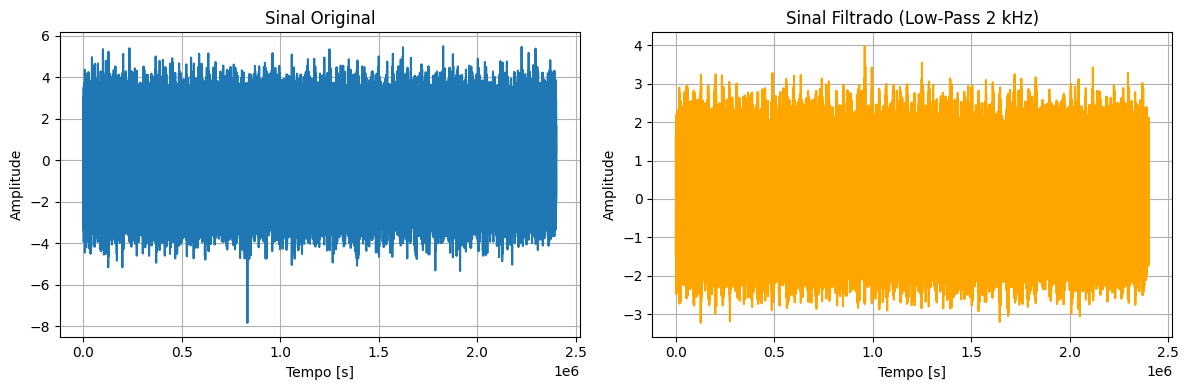

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(vector_1, label='Sinal Original')
plt.title('Sinal Original')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot 2: Sinal filtrado
plt.subplot(1, 2, 2)
plt.plot(filtered_vectors[0], label='Sinal Filtrado', color='orange')
plt.title('Sinal Filtrado (Low-Pass 2 kHz)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def pre_process(sinal):
    # Exemplo de sinal (substitua pelo seu)
    fs = 40000  # frequência de amostragem em Hz
    sinal = np.array(sinal)

    # 1. RMS
    rms = np.sqrt(np.mean(sinal**2))

    # 2. Peak-to-Peak
    peak_to_peak = np.ptp(sinal)  # equivalente a: np.max(sinal) - np.min(sinal)

    # 3. Standard Deviation
    std = np.std(sinal)

    # 4. PSD (Power Spectral Density) usando Welch
    frequencies, psd = signal.welch(sinal, fs=fs)

    # Exibir os resultados
    print(f"RMS: {rms:.4f}")
    print(f"Peak-to-Peak: {peak_to_peak:.4f}")
    print(f"Standard Deviation: {std:.4f}")

    return rms, peak_to_peak, std

# # Plot da PSD
# plt.semilogy(frequencies, psd)
# plt.title('Power Spectral Density (PSD)')
# plt.xlabel('Frequência [Hz]')
# plt.ylabel('Potência [V²/Hz]')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
fs=40000
features = []

for i, vetor in enumerate(vectors):
    label = "Healthy" if i == 0 else f"Damage {i}"
    print(label)

    vetor_filtrado = lowpass_filter(vetor, fs=fs)
    rms, p2p, std, psd = pre_process(vetor_filtrado)

    features.append({
        'Label': label,
        'RMS': rms,
        'Peak2Peak': p2p,
        'STD': std
    })

df_features = pd.DataFrame(features)

print(" ")
print("Sensor AN3")
print(df_features[['Label', 'RMS', 'Peak2Peak', 'STD']])  

Healthy
RMS: 0.7923
Peak-to-Peak: 7.2021
Standard Deviation: 0.7923
Damage 1
RMS: 1.9781
Peak-to-Peak: 14.7912
Standard Deviation: 1.9779
Damage 2
RMS: 1.9710
Peak-to-Peak: 15.3420
Standard Deviation: 1.9708
Damage 3
RMS: 1.9666
Peak-to-Peak: 14.5903
Standard Deviation: 1.9663
Damage 4
RMS: 1.9567
Peak-to-Peak: 14.7915
Standard Deviation: 1.9565
Damage 5
RMS: 1.9479
Peak-to-Peak: 15.1708
Standard Deviation: 1.9477
Damage 6
RMS: 1.9352
Peak-to-Peak: 14.6379
Standard Deviation: 1.9350
Damage 7
RMS: 1.9168
Peak-to-Peak: 14.7248
Standard Deviation: 1.9166
 
Sensor AN3
      Label       RMS  Peak2Peak       STD
0   Healthy  0.792288   7.202081  0.792280
1  Damage 1  1.978127  14.791195  1.977906
2  Damage 2  1.971001  15.342026  1.970777
3  Damage 3  1.966556  14.590275  1.966329
4  Damage 4  1.956718  14.791462  1.956490
5  Damage 5  1.947932  15.170808  1.947696
6  Damage 6  1.935196  14.637933  1.934951
7  Damage 7  1.916843  14.724755  1.916587


### IAs

##### Self-Training com Random Forest

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Parameters
confidence_threshold = 0.9
max_iter = 10

# Initial labeled data
X_train = X_labeled.copy()
y_train = y_labeled.copy()

# Unlabeled pool
X_pool = X_unlabeled.copy()

for iteration in range(max_iter):
    print(f"\nIteration {iteration + 1}")
    
    # Train the model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # Predict probabilities on the pool
    probs = model.predict_proba(X_pool)
    preds = np.argmax(probs, axis=1)
    confidences = np.max(probs, axis=1)
    
    # Select high-confidence samples
    mask = confidences >= confidence_threshold
    if not np.any(mask):
        print("No high-confidence predictions found. Stopping.")
        break

    # Add pseudo-labeled data to training set
    X_pseudo = X_pool[mask]
    y_pseudo = preds[mask]
    
    print(f"Adding {len(y_pseudo)} pseudo-labeled samples.")

    # Update training data
    X_train = np.vstack([X_train, X_pseudo])
    y_train = np.concatenate([y_train, y_pseudo])
    
    # Remove used samples from the pool
    X_pool = X_pool[~mask]

# Evaluate on test set
if 'X_test' in locals():
    y_pred = model.predict(X_test)
    print("\nTest accuracy:", accuracy_score(y_test, y_pred))


##### Autoencoder

In [ ]:
#Autoencoder para sinais de vibração com Conv1D

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D
from tensorflow.keras.optimizers import Adam

# Simulando sinais de vibração (substitua pelos seus dados reais)
# Exemplo: 1000 amostras, cada uma com 128 pontos
num_samples = 1000
signal_length = 128
X = np.random.randn(num_samples, signal_length)  # sinal com ruído

# Normalização e reshape para [amostras, tempo, canais]
X = (X - X.mean()) / X.std()
X = X[..., np.newaxis]

# Modelo Autoencoder 1D
input_sig = Input(shape=(signal_length, 1))

# Codificador
x = Conv1D(16, 3, activation='relu', padding='same')(input_sig)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(2, padding='same')(x)  # [None, 32, 8]

# Decodificador
x = Conv1D(8, 3, activation='relu', padding='same')(encoded)
x = UpSampling1D(2)(x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
decoded = Conv1D(1, 3, activation='linear', padding='same')(x)

autoencoder = Model(input_sig, decoded)
autoencoder.compile(optimizer=Adam(1e-3), loss='mse')
autoencoder.summary()

# Treinamento
autoencoder.fit(X, X,
                epochs=20,
                batch_size=32,
                shuffle=True,
                validation_split=0.2)

# Reconstrução
X_recon = autoencoder.predict(X[:10])

# Plot do sinal original vs reconstruído
for i in range(3):
    plt.figure(figsize=(10, 2))
    plt.plot(X[i], label='Original')
    plt.plot(X_recon[i], label='Reconstruído')
    plt.legend()
    plt.title(f"Amostra {i}")
    plt.show()


In [ ]:
#usando erro de reconstrução para detectar anomalias

recon_error = np.mean((X - X_recon) ** 2, axis=(1, 2))
limiar = np.percentile(recon_error, 95)
anomalias = recon_error > limiar


In [ ]:
import pandas as pd

df_healthy_data = pd.read_csv(os.path.join(path, "Healthy_data.csv"))
df_damaged_data = pd.read_csv(os.path.join(path, "Damaged_data.csv"))

In [ ]:
df_healthy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 90 columns):
 #   Column     Dtype  
---  ------     -----  
 0   H1_AN3     float64
 1   H1_AN4     float64
 2   H1_AN5     float64
 3   H1_AN6     float64
 4   H1_AN7     float64
 5   H1_AN8     float64
 6   H1_AN9     float64
 7   H1_AN10    float64
 8   H1_Speed   float64
 9   H10_AN3    float64
 10  H10_AN4    float64
 11  H10_AN5    float64
 12  H10_AN6    float64
 13  H10_AN7    float64
 14  H10_AN8    float64
 15  H10_AN9    float64
 16  H10_AN10   float64
 17  H10_Speed  float64
 18  H2_AN3     float64
 19  H2_AN4     float64
 20  H2_AN5     float64
 21  H2_AN6     float64
 22  H2_AN7     float64
 23  H2_AN8     float64
 24  H2_AN9     float64
 25  H2_AN10    float64
 26  H2_Speed   float64
 27  H3_AN3     float64
 28  H3_AN4     float64
 29  H3_AN5     float64
 30  H3_AN6     float64
 31  H3_AN7     float64
 32  H3_AN8     float64
 33  H3_AN9     float64
 34  H3_AN10    float64

In [ ]:
df_damaged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 100 columns):
 #   Column      Dtype  
---  ------      -----  
 0   D1_AN3      float64
 1   D1_AN4      float64
 2   D1_AN5      float64
 3   D1_AN6      float64
 4   D1_AN7      float64
 5   D1_AN8      float64
 6   D1_AN9      float64
 7   D1_AN10     float64
 8   D1_Speed    float64
 9   D1_Torque   float64
 10  D10_AN3     float64
 11  D10_AN4     float64
 12  D10_AN5     float64
 13  D10_AN6     float64
 14  D10_AN7     float64
 15  D10_AN8     float64
 16  D10_AN9     float64
 17  D10_AN10    float64
 18  D10_Speed   float64
 19  D10_Torque  float64
 20  D2_AN3      float64
 21  D2_AN4      float64
 22  D2_AN5      float64
 23  D2_AN6      float64
 24  D2_AN7      float64
 25  D2_AN8      float64
 26  D2_AN9      float64
 27  D2_AN10     float64
 28  D2_Speed    float64
 29  D2_Torque   float64
 30  D3_AN3      float64
 31  D3_AN4      float64
 32  D3_AN5      float64
 33  D3_AN6

In [ ]:
print("Shape Healthy Data DF:", df_healthy_data.shape)
print("Shape Damaged Data DF:", df_damaged_data.shape)

Shape Healthy Data DF: (2400000, 90)
Shape Damaged Data DF: (2400000, 100)


In [ ]:
df_healthy_data.columns

Index(['H1_AN3', 'H1_AN4', 'H1_AN5', 'H1_AN6', 'H1_AN7', 'H1_AN8', 'H1_AN9',
       'H1_AN10', 'H1_Speed', 'H10_AN3', 'H10_AN4', 'H10_AN5', 'H10_AN6',
       'H10_AN7', 'H10_AN8', 'H10_AN9', 'H10_AN10', 'H10_Speed', 'H2_AN3',
       'H2_AN4', 'H2_AN5', 'H2_AN6', 'H2_AN7', 'H2_AN8', 'H2_AN9', 'H2_AN10',
       'H2_Speed', 'H3_AN3', 'H3_AN4', 'H3_AN5', 'H3_AN6', 'H3_AN7', 'H3_AN8',
       'H3_AN9', 'H3_AN10', 'H3_Speed', 'H4_AN3', 'H4_AN4', 'H4_AN5', 'H4_AN6',
       'H4_AN7', 'H4_AN8', 'H4_AN9', 'H4_AN10', 'H4_Speed', 'H5_AN3', 'H5_AN4',
       'H5_AN5', 'H5_AN6', 'H5_AN7', 'H5_AN8', 'H5_AN9', 'H5_AN10', 'H5_Speed',
       'H6_AN3', 'H6_AN4', 'H6_AN5', 'H6_AN6', 'H6_AN7', 'H6_AN8', 'H6_AN9',
       'H6_AN10', 'H6_Speed', 'H7_AN3', 'H7_AN4', 'H7_AN5', 'H7_AN6', 'H7_AN7',
       'H7_AN8', 'H7_AN9', 'H7_AN10', 'H7_Speed', 'H8_AN3', 'H8_AN4', 'H8_AN5',
       'H8_AN6', 'H8_AN7', 'H8_AN8', 'H8_AN9', 'H8_AN10', 'H8_Speed', 'H9_AN3',
       'H9_AN4', 'H9_AN5', 'H9_AN6', 'H9_AN7', 'H9_AN8', 'H9

In [ ]:
df_damaged_data.columns

Index(['D1_AN3', 'D1_AN4', 'D1_AN5', 'D1_AN6', 'D1_AN7', 'D1_AN8', 'D1_AN9',
       'D1_AN10', 'D1_Speed', 'D1_Torque', 'D10_AN3', 'D10_AN4', 'D10_AN5',
       'D10_AN6', 'D10_AN7', 'D10_AN8', 'D10_AN9', 'D10_AN10', 'D10_Speed',
       'D10_Torque', 'D2_AN3', 'D2_AN4', 'D2_AN5', 'D2_AN6', 'D2_AN7',
       'D2_AN8', 'D2_AN9', 'D2_AN10', 'D2_Speed', 'D2_Torque', 'D3_AN3',
       'D3_AN4', 'D3_AN5', 'D3_AN6', 'D3_AN7', 'D3_AN8', 'D3_AN9', 'D3_AN10',
       'D3_Speed', 'D3_Torque', 'D4_AN3', 'D4_AN4', 'D4_AN5', 'D4_AN6',
       'D4_AN7', 'D4_AN8', 'D4_AN9', 'D4_AN10', 'D4_Speed', 'D4_Torque',
       'D5_AN3', 'D5_AN4', 'D5_AN5', 'D5_AN6', 'D5_AN7', 'D5_AN8', 'D5_AN9',
       'D5_AN10', 'D5_Speed', 'D5_Torque', 'D6_AN3', 'D6_AN4', 'D6_AN5',
       'D6_AN6', 'D6_AN7', 'D6_AN8', 'D6_AN9', 'D6_AN10', 'D6_Speed',
       'D6_Torque', 'D7_AN3', 'D7_AN4', 'D7_AN5', 'D7_AN6', 'D7_AN7', 'D7_AN8',
       'D7_AN9', 'D7_AN10', 'D7_Speed', 'D7_Torque', 'D8_AN3', 'D8_AN4',
       'D8_AN5', 'D8_AN6', 'D8_

In [ ]:
df_healthy_data.describe()

,H1_AN3,H1_AN4,H1_AN5,H1_AN6,H1_AN7,H1_AN8,H1_AN9,H1_AN10,H1_Speed,H10_AN3,...,H8_Speed,H9_AN3,H9_AN4,H9_AN5,H9_AN6,H9_AN7,H9_AN8,H9_AN9,H9_AN10,H9_Speed
count,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,...,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06
mean,-3.548204e-03,-2.270035e-03,-9.120902e-02,-2.376961e-01,1.889248e-02,-8.537850e-02,-3.791085e-01,4.922566e-03,9.217280e-02,-3.707808e-03,...,9.209952e-02,-3.638959e-03,-2.358106e-03,-9.261768e-02,-2.372488e-01,1.924441e-02,-8.605887e-02,-3.790584e-01,5.181249e-03,9.200981e-02
std,1.133665e+00,1.915300e+00,1.714996e+00,2.805042e+00,2.622841e+00,4.736997e+00,2.129972e+00,1.901185e+00,6.579462e-01,1.131662e+00,...,6.576863e-01,1.128943e+00,1.916503e+00,1.724761e+00,2.813745e+00,2.620186e+00,4.777155e+00,1.974639e+00,1.925074e+00,6.573844e-01
min,-7.840844e+00,-9.193722e+00,-9.034289e+00,-1.421949e+01,-1.383045e+01,-1.972974e+01,-7.741262e+00,-9.871553e+00,-4.316614e-01,-7.099937e+00,...,-4.317064e-01,-9.422126e+00,-9.580924e+00,-8.309602e+00,-1.344436e+01,-1.347414e+01,-2.009490e+01,-7.566517e+00,-9.690559e+00,-4.317193e-01
25%,-7.751742e-01,-1.324300e+00,-1.250523e+00,-2.130891e+00,-1.739292e+00,-3.434864e+00,-1.844292e+00,-1.280547e+00,6.007124e-04,-7.736472e-01,...,6.007124e-04,-7.700118e-01,-1.328665e+00,-1.260078e+00,-2.138632e+00,-1.741614e+00,-3.463130e+00,-1.732611e+00,-1.293833e+00,5.955715e-04
50%,-1.213865e-02,4.244571e-02,-9.605065e-02,-2.484165e-01,1.489552e-02,-6.017724e-02,-3.487066e-01,-2.316849e-02,6.161537e-04,-1.405337e-02,...,6.161537e-04,-1.422309e-02,4.328990e-02,-1.024621e-01,-2.457556e-01,1.166878e-02,-5.266568e-02,-3.681798e-01,-1.783937e-02,6.110035e-04
75%,7.591190e-01,1.348263e+00,1.062067e+00,1.644943e+00,1.772567e+00,3.272652e+00,1.109867e+00,1.261907e+00,6.328709e-04,7.555501e-01,...,6.328709e-04,7.515996e-01,1.354462e+00,1.066593e+00,1.654135e+00,1.772179e+00,3.289554e+00,9.820648e-01,1.279146e+00,6.264448e-04
max,5.500267e+00,8.927255e+00,8.339746e+00,1.383066e+01,1.296540e+01,2.014414e+01,8.095802e+00,1.131551e+01,5.294780e+00,6.115024e+00,...,5.294752e+00,6.727648e+00,1.085586e+01,8.390530e+00,1.475405e+01,1.361556e+01,2.308033e+01,8.718822e+00,1.001882e+01,5.294691e+00


In [ ]:
df_damaged_data.describe()

,D1_AN3,D1_AN4,D1_AN5,D1_AN6,D1_AN7,D1_AN8,D1_AN9,D1_AN10,D1_Speed,D1_Torque,...,D9_AN3,D9_AN4,D9_AN5,D9_AN6,D9_AN7,D9_AN8,D9_AN9,D9_AN10,D9_Speed,D9_Torque
count,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,...,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06
mean,-2.958428e-02,-1.880567e-02,-1.288336e-01,-3.949460e-02,-5.569755e-02,-3.979978e-02,-8.106140e-02,-1.677803e-02,1.799823e+03,1.503510e+02,...,-3.151691e-02,-2.018848e-02,-1.349382e-01,-4.644165e-02,-6.140521e-02,-4.421506e-02,-8.565848e-02,-1.758179e-02,1.800659e+03,1.517933e+02
std,2.874807e+00,2.914573e+00,3.856423e+00,4.024469e+00,3.773341e+00,7.564009e+00,7.154355e+00,3.963131e+00,3.052476e+00,5.169923e+00,...,2.818258e+00,2.729317e+00,3.963212e+00,4.433435e+00,4.017443e+00,8.214511e+00,7.237179e+00,4.064885e+00,3.097104e+00,5.052742e+00
min,-1.135485e+01,-1.287084e+01,-1.994222e+01,-1.821536e+01,-1.736795e+01,-3.328639e+01,-3.307267e+01,-1.933264e+01,1.792918e+03,1.376544e+02,...,-1.211726e+01,-1.303728e+01,-1.810066e+01,-2.171660e+01,-1.911064e+01,-3.754949e+01,-3.144140e+01,-2.027567e+01,1.794019e+03,1.400799e+02
25%,-2.040907e+00,-1.951915e+00,-2.693848e+00,-2.779114e+00,-2.633304e+00,-5.122533e+00,-5.015645e+00,-2.701699e+00,1.796816e+03,1.455953e+02,...,-1.996755e+00,-1.856942e+00,-2.814008e+00,-3.047574e+00,-2.788583e+00,-5.519504e+00,-5.049371e+00,-2.738790e+00,1.797799e+03,1.472200e+02
50%,-7.433626e-02,4.150427e-03,-2.290346e-01,-4.444429e-02,-1.086357e-01,7.372648e-02,-1.485469e-01,-2.846304e-02,1.800508e+03,1.501769e+02,...,-5.168858e-02,-2.109232e-02,-2.398639e-01,-4.468415e-02,-9.566598e-02,1.102062e-01,-1.681174e-01,1.232888e-02,1.801231e+03,1.515566e+02
75%,1.929077e+00,1.937066e+00,2.355113e+00,2.699330e+00,2.467316e+00,5.162461e+00,4.795604e+00,2.685085e+00,1.802358e+03,1.551655e+02,...,1.904465e+00,1.826855e+00,2.455298e+00,2.965035e+00,2.642227e+00,5.573186e+00,4.802496e+00,2.756806e+00,1.803144e+03,1.564123e+02
max,1.181908e+01,1.322496e+01,2.236811e+01,1.883769e+01,1.788781e+01,3.560002e+01,3.399795e+01,1.707086e+01,1.805685e+03,1.771667e+02,...,1.218050e+01,1.850328e+01,1.913089e+01,1.955023e+01,2.141328e+01,3.850512e+01,3.585951e+01,1.890848e+01,1.807394e+03,1.640275e+02


In [9]:
import re
from collections import defaultdict


grouped_columns = defaultdict(list)

# Step 1: Group columns by prefix like D1_, D2_, D10_, etc.
for col in df_damaged_data.columns:
    match = re.match(r'^(D\d+)_', col)  # Match D1_, D2_, ..., not D10_ as D1
    if match:
        prefix = match.group(1)  # e.g., 'D1', 'D10'
        grouped_columns[prefix].append(col)

# Step 2: Create sub-DataFrames for each group
grouped_dfs = {prefix: df_damaged_data[cols] for prefix, cols in grouped_columns.items()}

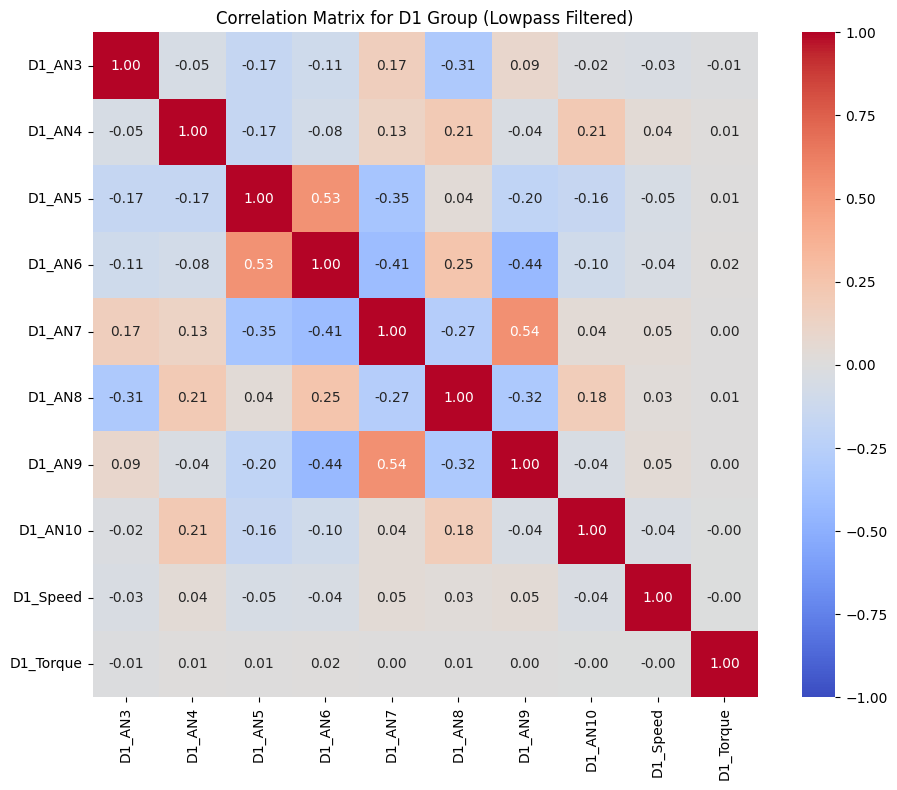

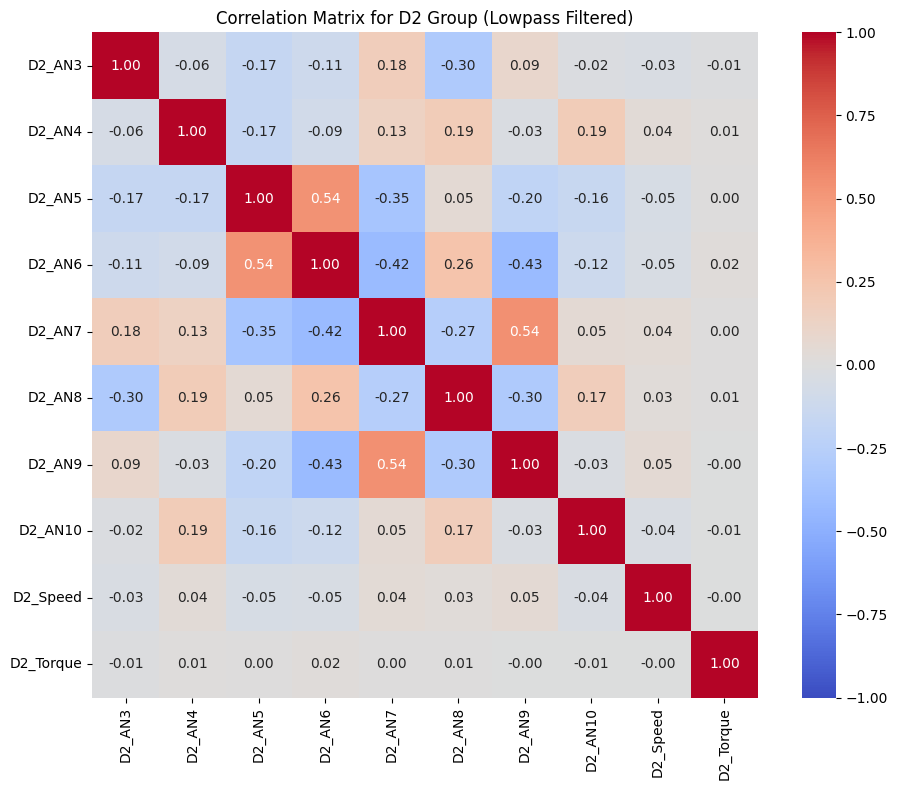

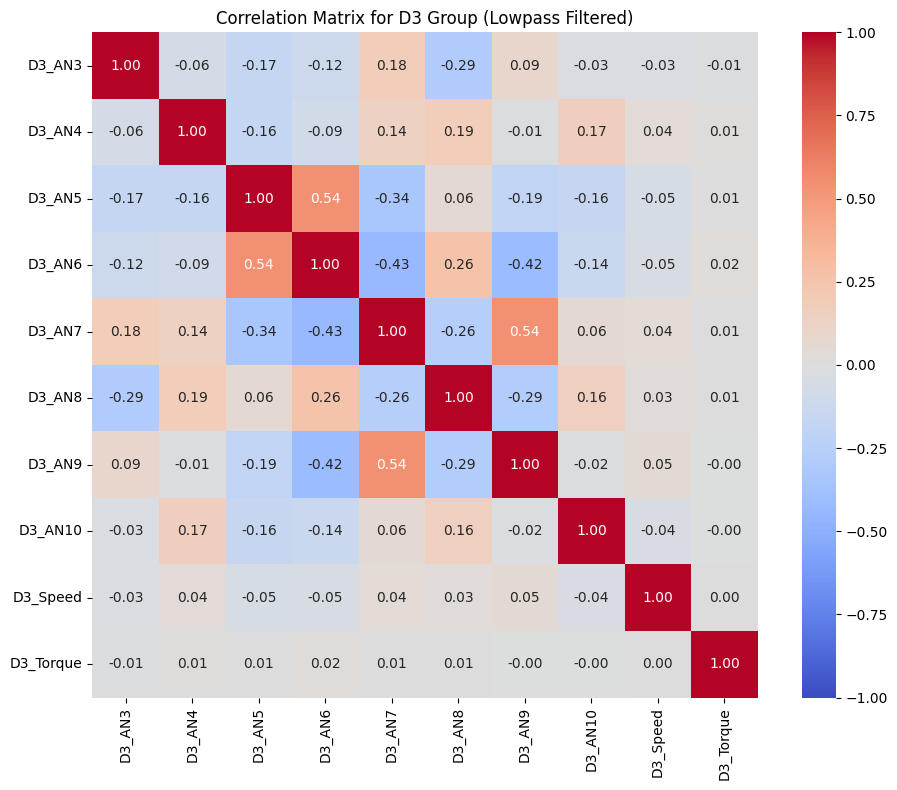

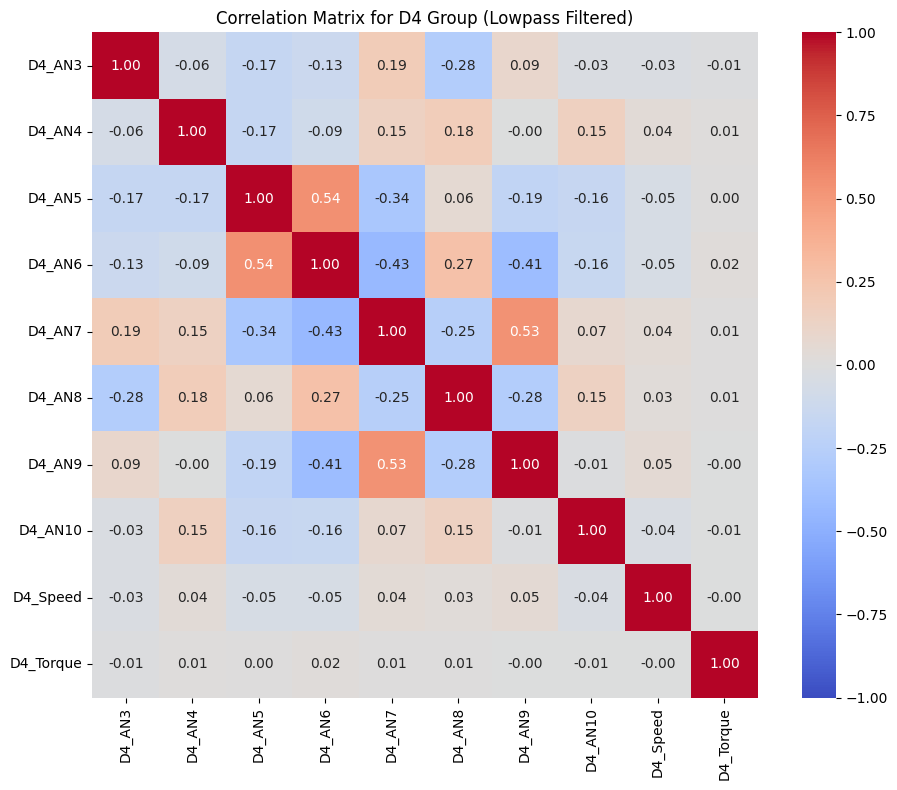

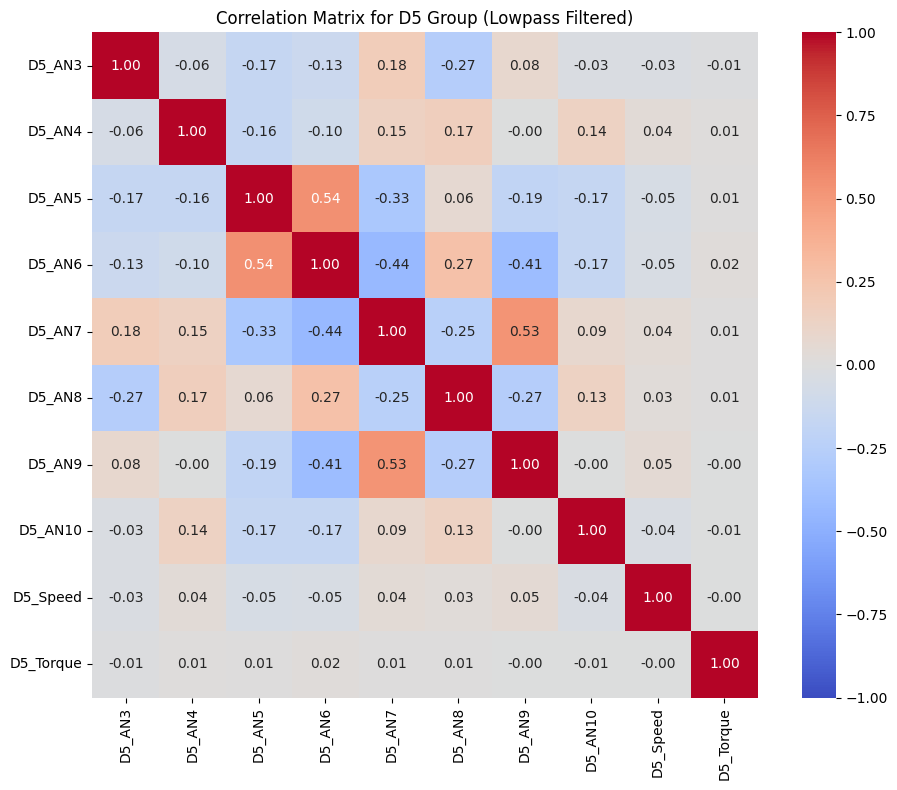

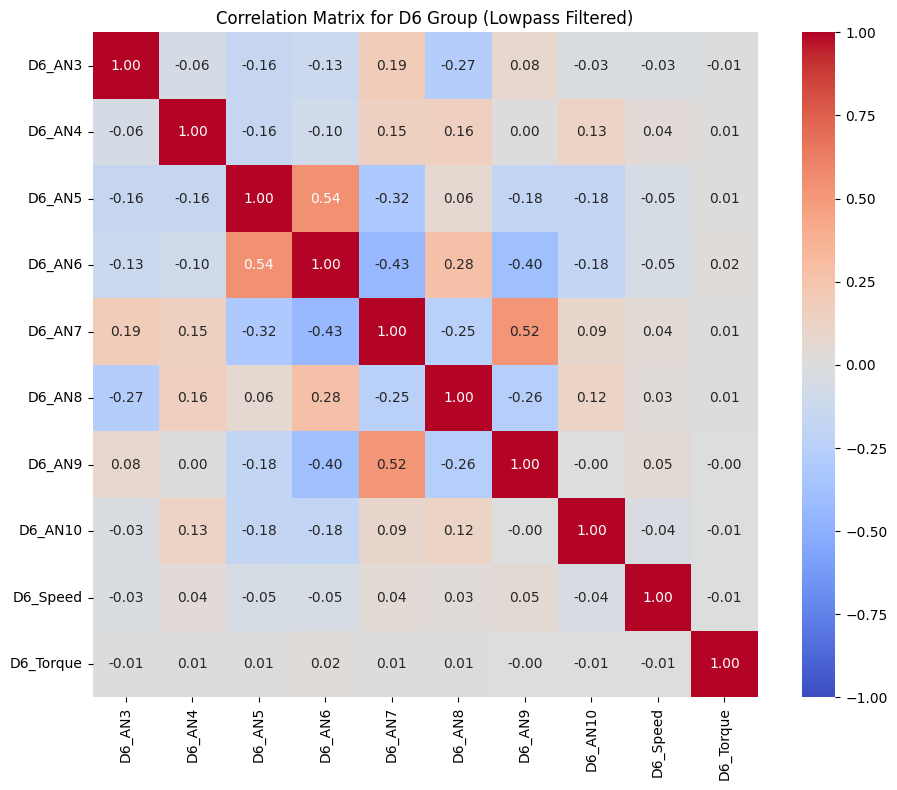

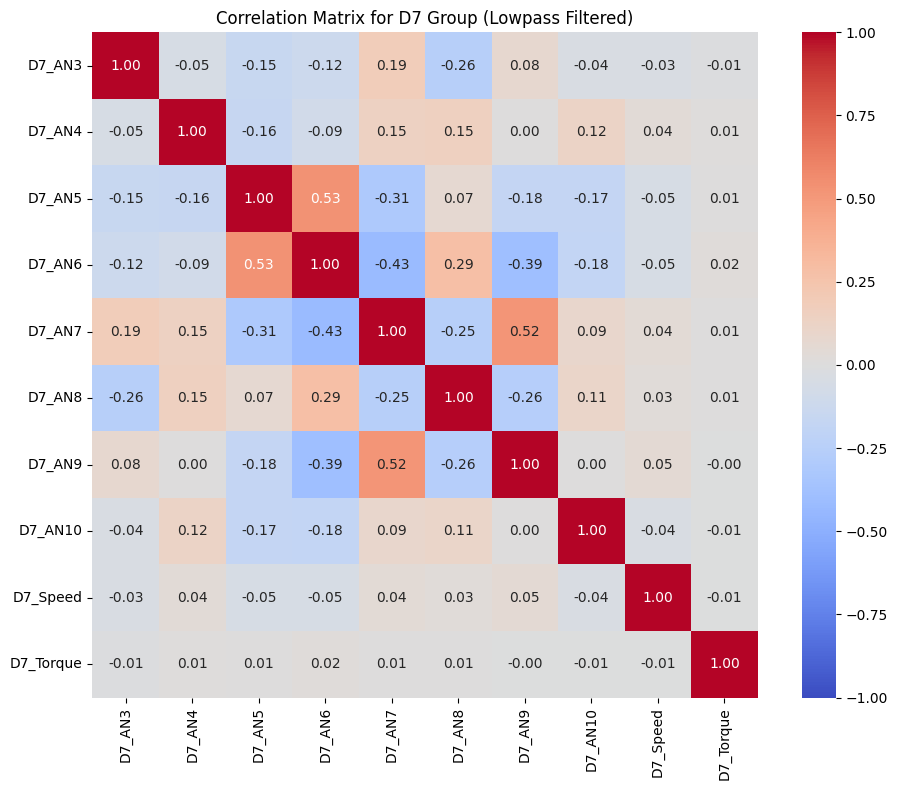

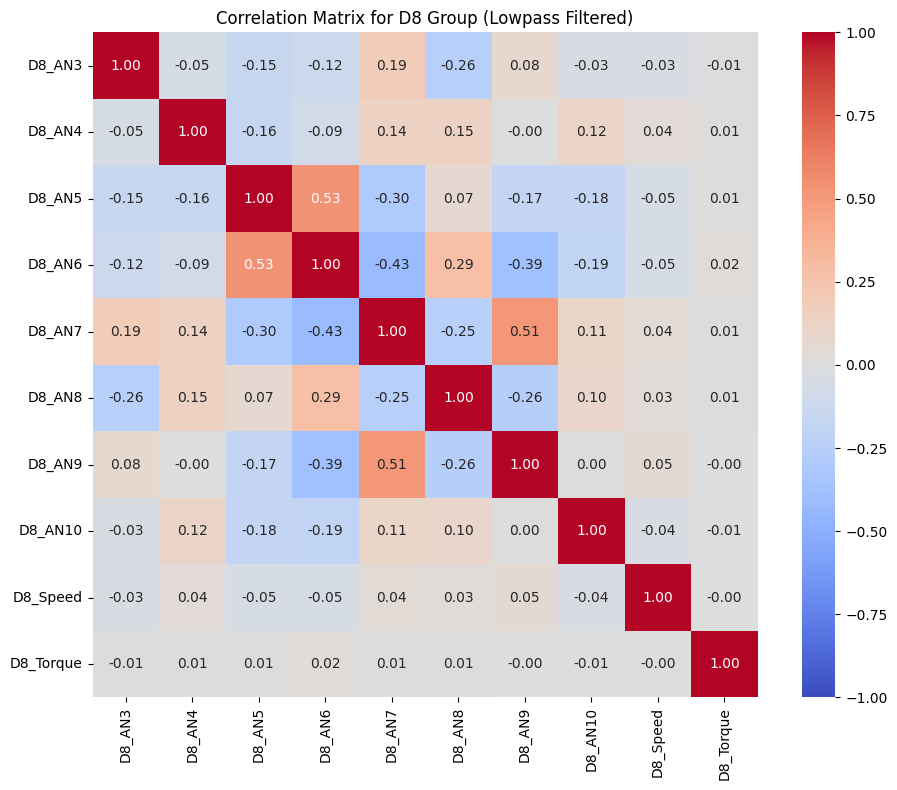

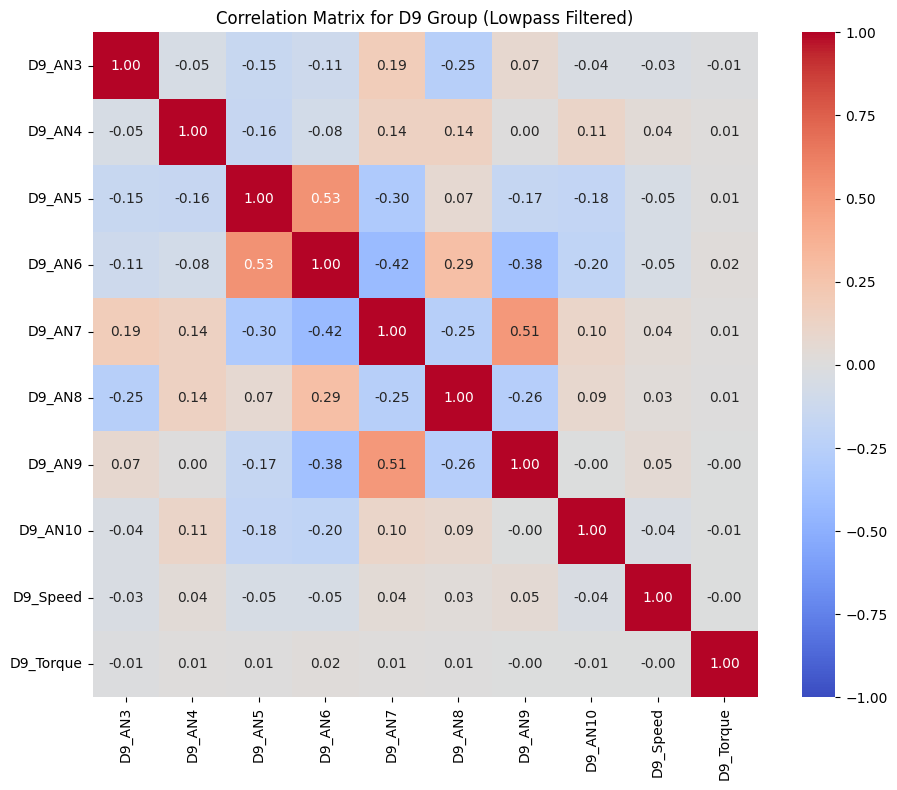

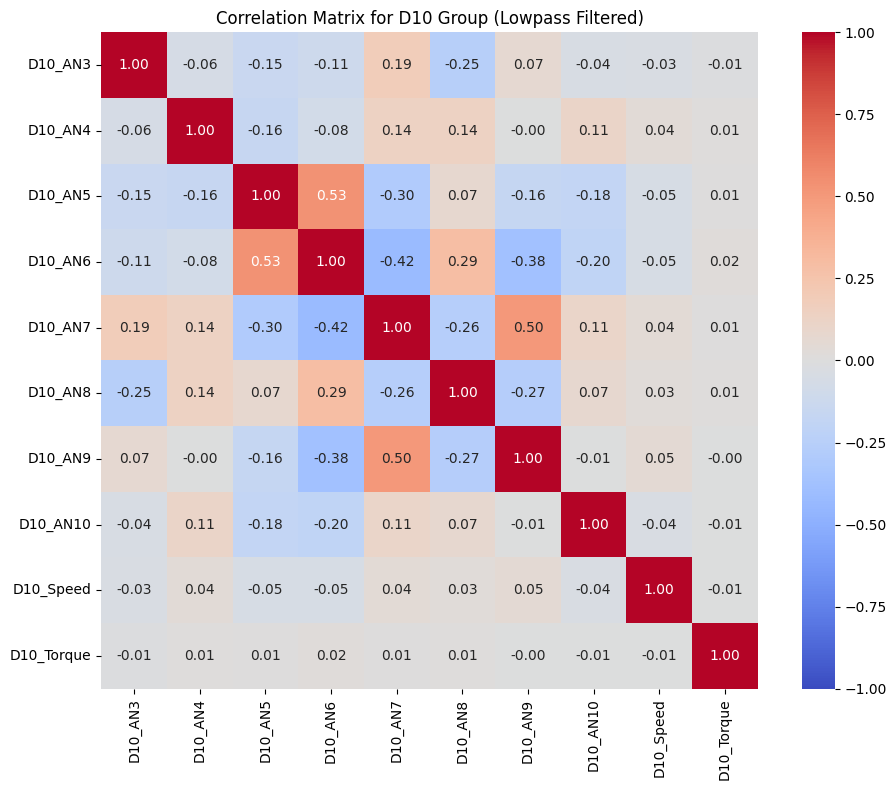

: 

In [ ]:
### CONTINUAR A PARTIR DAQUI 10/07/25

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

damage_class = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']

for damage in damage_class:
    df_damage = grouped_dfs[f'{damage}']

    # Aplicar o lowpass_filter em cada coluna (vetor)
    df_damage_filtered = df_damage.apply(lambda col: lowpass_filter(col, fs=40000), axis=0)


    # Calcular a matriz de correlação
    corr_matrix = df_damage_filtered.corr()

    # Plotar o heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
                vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix for {damage} Group (Lowpass Filtered)')
    plt.tight_layout()
    plt.savefig(f"Correlation_Matrix_{damage}_Group_Filtered.png", dpi=600)
    plt.show()


In [20]:
df_damaged_data.corr()

,D1_AN3,D1_AN4,D1_AN5,D1_AN6,D1_AN7,D1_AN8,D1_AN9,D1_AN10,D1_Speed,D1_Torque,...,D9_AN3,D9_AN4,D9_AN5,D9_AN6,D9_AN7,D9_AN8,D9_AN9,D9_AN10,D9_Speed,D9_Torque
D1_AN3,1.000000,-0.161804,-0.075012,-0.011772,0.061905,-0.147249,0.106464,0.012268,-0.022533,-0.008775,...,0.001338,-0.000438,0.003553,0.003633,-0.000846,-0.002070,0.000530,-0.005207,-0.002010,-0.000600
D1_AN4,-0.161804,1.000000,-0.176114,0.001465,-0.056937,-0.086271,-0.108760,0.099315,0.026892,0.008065,...,0.000998,-0.000135,-0.000481,-0.002801,0.000616,0.000478,-0.000283,0.003302,0.001642,0.000475
D1_AN5,-0.075012,-0.176114,1.000000,0.289444,-0.069568,0.074335,0.063061,-0.166643,-0.033676,0.003828,...,0.001158,0.001983,-0.001553,0.004341,-0.003270,-0.000285,-0.001563,-0.000475,0.001758,-0.000084
D1_AN6,-0.011772,0.001465,0.289444,1.000000,-0.188478,0.085713,-0.232153,-0.053299,-0.022971,0.008671,...,0.001682,0.003683,0.000503,0.004619,-0.001458,0.000345,-0.000540,-0.004164,-0.001817,0.001743
D1_AN7,0.061905,-0.056937,-0.069568,-0.188478,1.000000,0.052059,0.346557,0.012324,0.021419,0.001470,...,-0.004549,0.003378,-0.000247,-0.002834,0.002249,-0.001314,0.000687,0.001569,0.007319,0.001891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D9_AN8,-0.002070,0.000478,-0.000285,0.000345,-0.001314,-0.001683,-0.001880,-0.000201,-0.001635,0.000242,...,-0.095364,-0.127542,0.131737,0.091411,0.077379,1.000000,0.044661,0.061811,0.011292,0.002946
D9_AN9,0.000530,-0.000283,-0.001563,-0.000540,0.000687,0.000667,-0.001971,0.001416,-0.003757,-0.000111,...,0.090163,-0.032761,0.063805,-0.162414,0.327445,0.044661,1.000000,-0.102790,0.016425,-0.000106
D9_AN10,-0.005207,0.003302,-0.000475,-0.004164,0.001569,-0.002408,0.001174,0.000353,-0.006354,-0.000912,...,0.021887,0.036917,-0.157943,-0.103859,0.053881,0.061811,-0.102790,1.000000,-0.022933,-0.004628
D9_Speed,-0.002010,0.001642,0.001758,-0.001817,0.007319,0.001325,0.003951,0.006733,-0.018751,-0.004280,...,-0.021597,0.026316,-0.037780,-0.026383,0.017876,0.011292,0.016425,-0.022933,1.000000,-0.002416
